## Group Members
### Muhammad (CS-22123)
### Muhammad Maaz (CS-22145)

# ML Project (Weather Dataset)

In [30]:
# pip install tensorflow
# pip install xgboost

In [31]:
import pandas as pd 
import numpy as np


In [32]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [33]:
df.shape

(96453, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [35]:
# looking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [36]:
# drop null values
df.dropna(inplace=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [37]:
# duplicate values
df.duplicated().sum()

24

In [38]:
# deleting duplicate values
df.drop_duplicates(inplace=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [39]:
# checking no of unique values in Target column
df['Summary'].nunique()

27

In [40]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [41]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31628
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10746
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [42]:
#finding top 3 most common weather conditions
topClasses= df['Summary'].value_counts().head(3)
topClasses

Summary
Partly Cloudy    31628
Mostly Cloudy    27914
Overcast         16516
Name: count, dtype: int64

In [43]:
# reducing dataset to top 3 weather conditions
df1 = df[df['Summary'].isin(topClasses.index)]
df1

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [44]:
topClasses.index

Index(['Partly Cloudy', 'Mostly Cloudy', 'Overcast'], dtype='object', name='Summary')

In [45]:
df1.shape

(76058, 12)

##  Encoding Categorical Variables

In [46]:
# encoding  Summary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Summary'] = le.fit_transform(df1['Summary'])
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_29396\2424738758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Summary'] = le.fit_transform(df1['Summary'])


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,2,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,2,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,0,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,2,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,0,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,2,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,2,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,2,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,2,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [47]:
# encoding all other features
df1['Daily Summary'] = le.fit_transform(df1['Daily Summary'])
df1['Precip Type'] = le.fit_transform(df1['Precip Type'])
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_29396\4056643697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Daily Summary'] = le.fit_transform(df1['Daily Summary'])
C:\Users\Home\AppData\Local\Temp\ipykernel_29396\4056643697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Precip Type'] = le.fit_transform(df1['Precip Type'])


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,195
1,2006-04-01 01:00:00.000 +0200,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,195
2,2006-04-01 02:00:00.000 +0200,0,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,195
3,2006-04-01 03:00:00.000 +0200,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,195
4,2006-04-01 04:00:00.000 +0200,0,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,195
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,168
96449,2016-09-09 20:00:00.000 +0200,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,168
96450,2016-09-09 21:00:00.000 +0200,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,168
96451,2016-09-09 22:00:00.000 +0200,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,168


In [48]:
# checking for outliers
df1.describe()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,76058.000000,76058.000000,76058.000000,76058.000000,76058.00000,76058.000000,76058.000000,76058.000000,76058.0,76058.000000,76058.000000
mean,1.048831,0.081596,12.932814,11.925325,0.71766,11.000323,189.436825,11.011030,0.0,1010.610103,133.806779
std,0.883445,0.273749,9.218695,10.383881,0.19218,6.248014,107.431771,3.388531,0.0,74.851242,53.072762
min,0.000000,0.000000,-20.555556,-24.233333,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,6.044444,3.794444,0.58000,6.295100,118.000000,9.982000,0.0,1011.630000,109.000000
50%,1.000000,0.000000,12.777778,12.777778,0.76000,10.593800,182.000000,10.352300,0.0,1015.900000,130.000000
75%,2.000000,0.000000,19.770833,19.770833,0.87000,14.345100,290.000000,14.908600,0.0,1020.200000,191.000000
max,2.000000,1.000000,39.588889,39.344444,1.00000,32.827900,359.000000,16.100000,0.0,1046.060000,210.000000


In [49]:
df1.drop('Formatted Date', axis=1, inplace=True)
df1.corr()

C:\Users\Home\AppData\Local\Temp\ipykernel_29396\2060055322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Formatted Date', axis=1, inplace=True)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,1.000000,-0.025500,0.171967,0.169719,-0.185851,-0.093745,-0.008116,0.098344,NaN,0.014460,0.306063
Precip Type,-0.025500,1.000000,-0.513515,-0.520818,0.184506,-0.038111,-0.035436,-0.230906,NaN,0.029657,-0.191906
Temperature (C),0.171967,-0.513515,1.000000,0.993429,-0.618952,-0.036563,0.029024,0.299187,NaN,-0.020271,0.403860
Apparent Temperature (C),0.169719,-0.520818,0.993429,1.000000,-0.590296,-0.092178,0.029928,0.295942,NaN,-0.018176,0.400472
Humidity,-0.185851,0.184506,-0.618952,-0.590296,1.000000,-0.179915,0.011320,-0.267379,NaN,-0.018962,-0.335079
Wind Speed (km/h),-0.093745,-0.038111,-0.036563,-0.092178,-0.179915,1.000000,0.083656,0.037184,NaN,-0.044346,-0.043686
Wind Bearing (degrees),-0.008116,-0.035436,0.029024,0.029928,0.011320,0.083656,1.000000,0.032485,NaN,-0.009729,0.044014
Visibility (km),0.098344,-0.230906,0.299187,0.295942,-0.267379,0.037184,0.032485,1.000000,NaN,0.020952,0.330595
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.014460,0.029657,-0.020271,-0.018176,-0.018962,-0.044346,-0.009729,0.020952,NaN,1.000000,0.029471


In [50]:
df1['Loud Cover'].unique()

array([0.])

In [51]:
df1.drop('Loud Cover', axis=1, inplace=True)
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_29396\2188509115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Loud Cover', axis=1, inplace=True)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,195
1,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,195
2,0,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,195
3,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,195
4,0,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,195
...,...,...,...,...,...,...,...,...,...,...
96448,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,168
96449,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,168
96450,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,168
96451,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,168


In [52]:
df1['Daily Summary'].nunique()

211

In [53]:
# high cardinality in Daily Summary
# df1.drop('Daily Summary', axis=1, inplace=True)
# df1

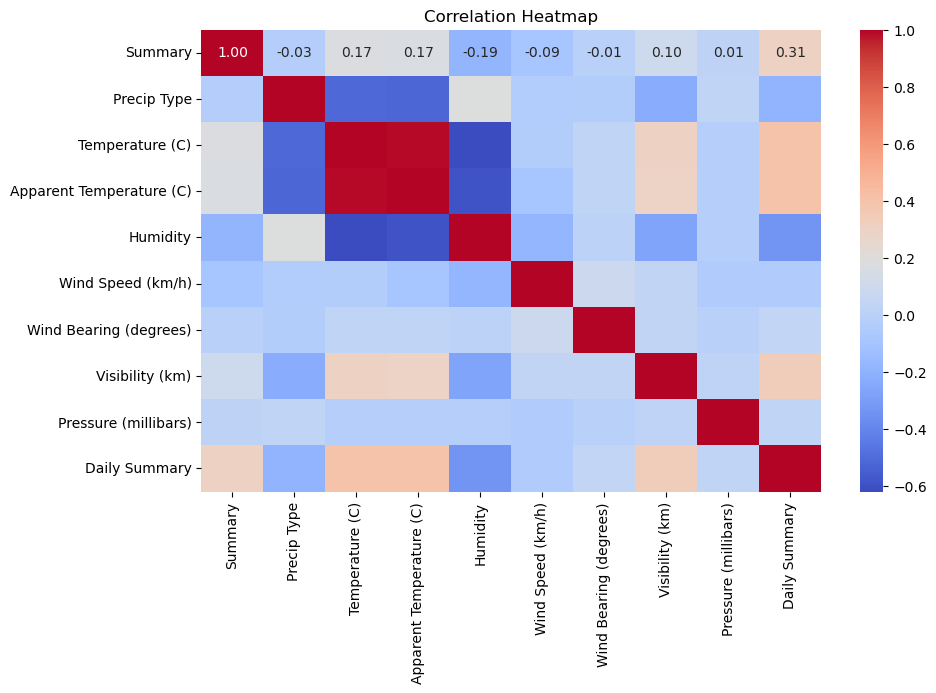

In [54]:
# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



## Scaling Data

In [55]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
# Seperating features and target variable
X = df1.drop('Summary', axis=1)
y = df1['Summary']

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.29806876, -0.37539093, -0.43687579, ...,  1.42105857,
         0.06038546,  1.15301372],
       [-0.29806876, -0.38804646, -0.45239139, ...,  1.42105857,
         0.06706542,  1.15301372],
       [-0.29806876, -0.38563588, -0.24533835, ...,  1.16448556,
         0.071207  ,  1.15301372],
       ...,
       [-0.29806876,  0.98779   ,  0.97397403, ...,  1.50183155,
         0.06746622,  0.64427485],
       [-0.29806876,  0.9317441 ,  0.9242171 , ...,  1.50183155,
         0.0713406 ,  0.64427485],
       [-0.29806876,  0.8142285 ,  0.81988804, ...,  1.33078288,
         0.07414618,  0.64427485]])

In [56]:
df1

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,195
1,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,195
2,0,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,195
3,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,195
4,0,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,195
...,...,...,...,...,...,...,...,...,...,...
96448,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,168
96449,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,168
96450,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,168
96451,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,168


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76058 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   76058 non-null  int32  
 1   Precip Type               76058 non-null  int32  
 2   Temperature (C)           76058 non-null  float64
 3   Apparent Temperature (C)  76058 non-null  float64
 4   Humidity                  76058 non-null  float64
 5   Wind Speed (km/h)         76058 non-null  float64
 6   Wind Bearing (degrees)    76058 non-null  float64
 7   Visibility (km)           76058 non-null  float64
 8   Pressure (millibars)      76058 non-null  float64
 9   Daily Summary             76058 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 5.5 MB


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    return {
        'Model': model.__class__.__name__,
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='macro'),
        'Recall': recall_score(y_test, y_pred_test, average='macro'),
        'F1 Score': f1_score(y_test, y_pred_test, average='macro')
    }

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 

split_ratios = [0.2, 0.3, 0.4]

models = [
    # Non-Parametric Models
    ("KNN_k=13", KNeighborsClassifier(n_neighbors=13)),
    ("KNN_k=5", KNeighborsClassifier(n_neighbors=5)),
    ("KNN_k=11", KNeighborsClassifier(n_neighbors=11)),

    ("RandomForest_50", RandomForestClassifier(n_estimators=50, random_state=42)),
    ("RandomForest_100", RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')),
    ("RandomForest_200", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("RandomForest_250", RandomForestClassifier(n_estimators=250, random_state=42, criterion='entropy')),

    ("GradientBoosting_50", GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ("GradientBoosting_100", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("GradientBoosting_200", GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ("GradientBoosting_250", GradientBoostingClassifier(n_estimators=250, random_state=42, learning_rate=0.4)),

    ("XGBoost_50", XGBClassifier(n_estimators=50, random_state=42)),
    ("XGBoost_100", XGBClassifier(n_estimators=100, random_state=42)),
    ("XGBoost_200", XGBClassifier(n_estimators=200, random_state=42)),
    ("XGBoost_270", XGBClassifier(n_estimators=270, random_state=42)),

    # Parametric Models
    ("LogReg_C=0.1", LogisticRegression(C=0.1, max_iter=500)),
    ("LogReg_C=100", LogisticRegression(C=100, penalty='l2', solver='saga', max_iter=1000)),
    ("LogReg_C=10", LogisticRegression(C=10)),

    # Neural Network (Shallow)
    ("MLP_1", MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)),
    ("MLP_2", MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000)),
    ("MLP_3", MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=500)),
]


In [51]:
results = []

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42, stratify=y)
    
    for name, model in models:
        result = evaluate_model(model, X_train, X_test, y_train, y_test)
        result['Test Size'] = test_size
        result['Model'] = name
        results.append(result)

df_results = pd.DataFrame(results)

c:\Users\Home\anaconda3\envs\ml-labs\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Home\anaconda3\envs\ml-labs\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Home\anaconda3\envs\ml-labs\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
# Display all rows in a DataFrame (e.g., your df_results)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Optional: for all columns
pd.set_option('display.width', None)        # Optional: don't wrap lines


df_results

# df_results.to_csv("model_results.csv", index=False)


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Test Size
0,KNN_k=13,0.691171,0.644031,0.640116,0.627497,0.632668,0.2
1,KNN_k=5,0.744009,0.631607,0.629131,0.619126,0.623284,0.2
2,KNN_k=11,0.697269,0.642848,0.639300,0.626799,0.631960,0.2
3,RandomForest_50,0.999836,0.698330,0.698453,0.687907,0.692405,0.2
4,RandomForest_100,0.999984,0.702603,0.702412,0.691607,0.696062,0.2
5,RandomForest_200,1.000000,0.701617,0.701927,0.690836,0.695416,0.2
6,RandomForest_250,1.000000,0.705627,0.706348,0.694626,0.699456,0.2
7,GradientBoosting_50,0.652697,0.652248,0.655138,0.631406,0.639806,0.2
8,GradientBoosting_100,0.659698,0.656192,0.658359,0.636938,0.644776,0.2
9,GradientBoosting_200,0.667866,0.659677,0.662517,0.641783,0.649505,0.2


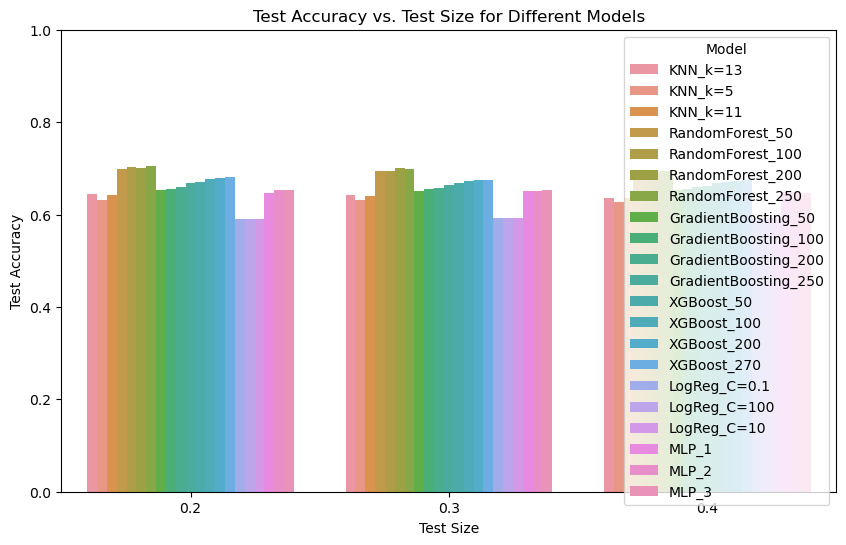

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graphical Comparison (e.g., Accuracy vs. Split)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Test Size', y='Test Accuracy', hue='Model')
plt.title("Test Accuracy vs. Test Size for Different Models")
plt.ylabel("Test Accuracy")
plt.xlabel("Test Size")
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()


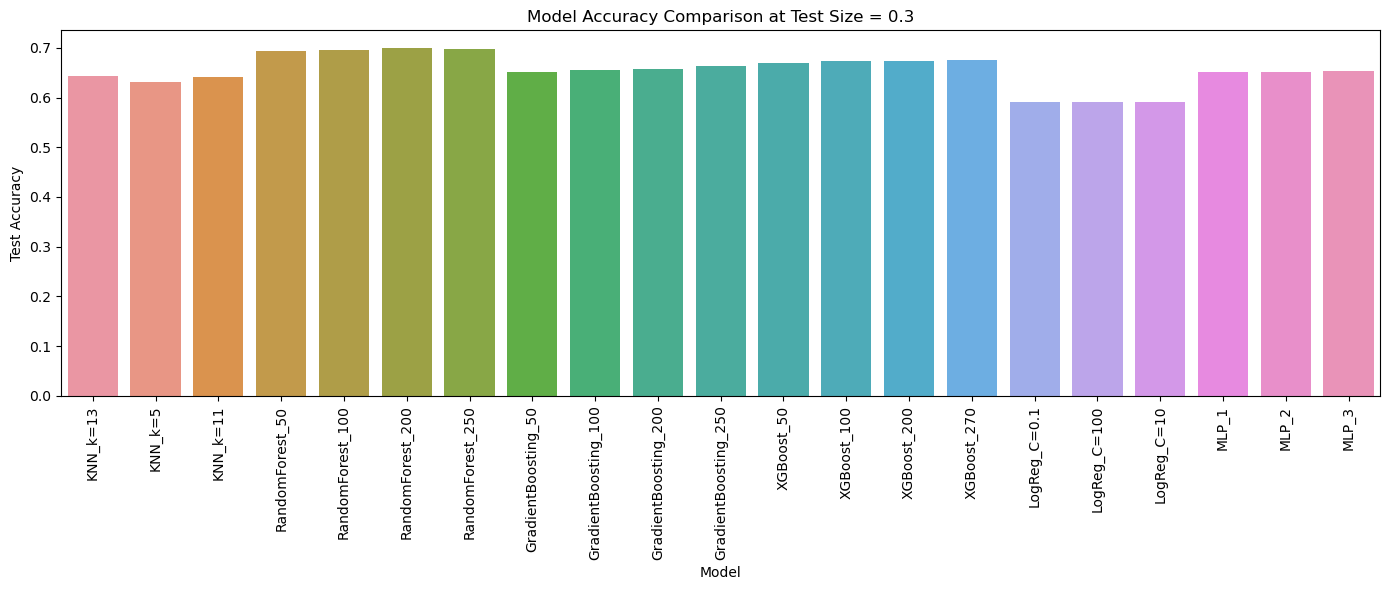

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=df_results[df_results['Test Size'] == 0.3], x='Model', y='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison at Test Size = 0.3')
plt.tight_layout()
plt.show()



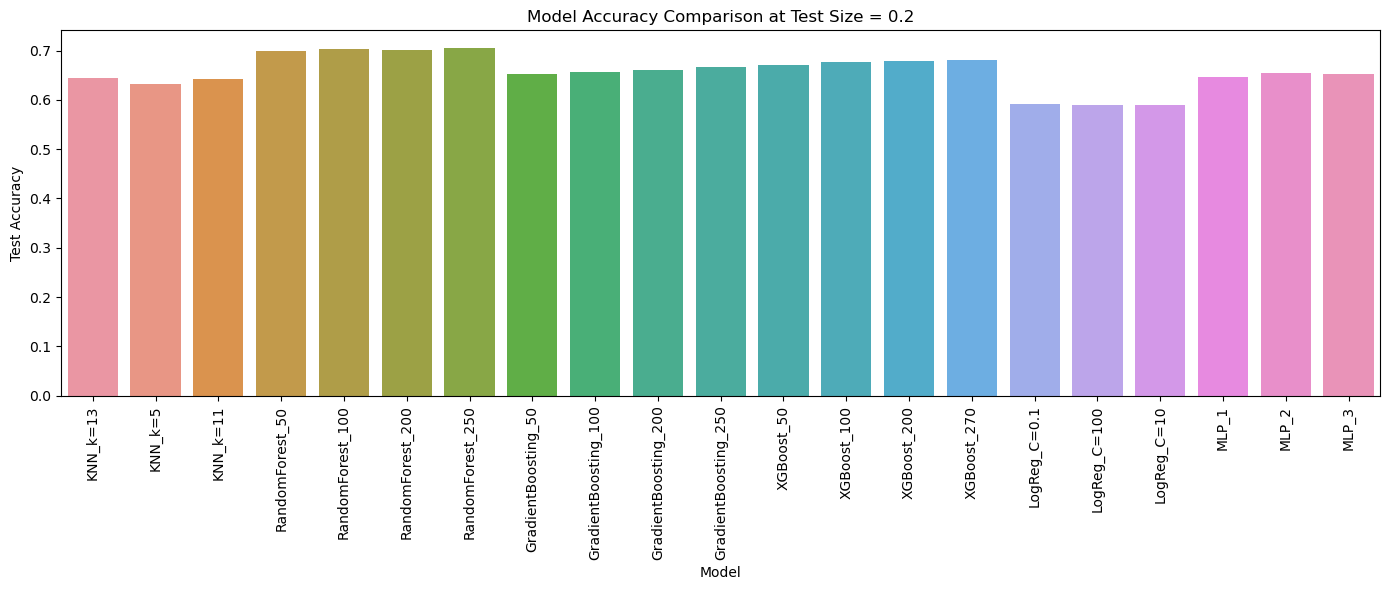

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=df_results[df_results['Test Size'] == 0.2], x='Model', y='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison at Test Size = 0.2')
plt.tight_layout()
plt.show()



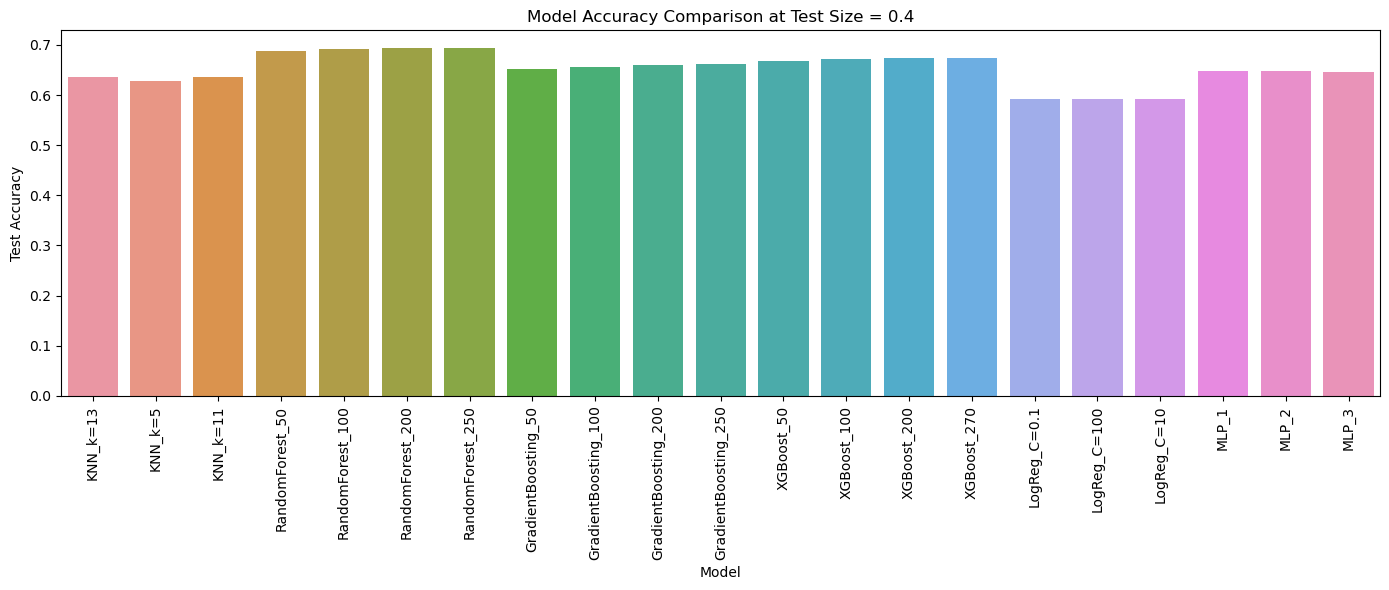

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=df_results[df_results['Test Size'] == 0.4], x='Model', y='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison at Test Size = 0.4')
plt.tight_layout()
plt.show()



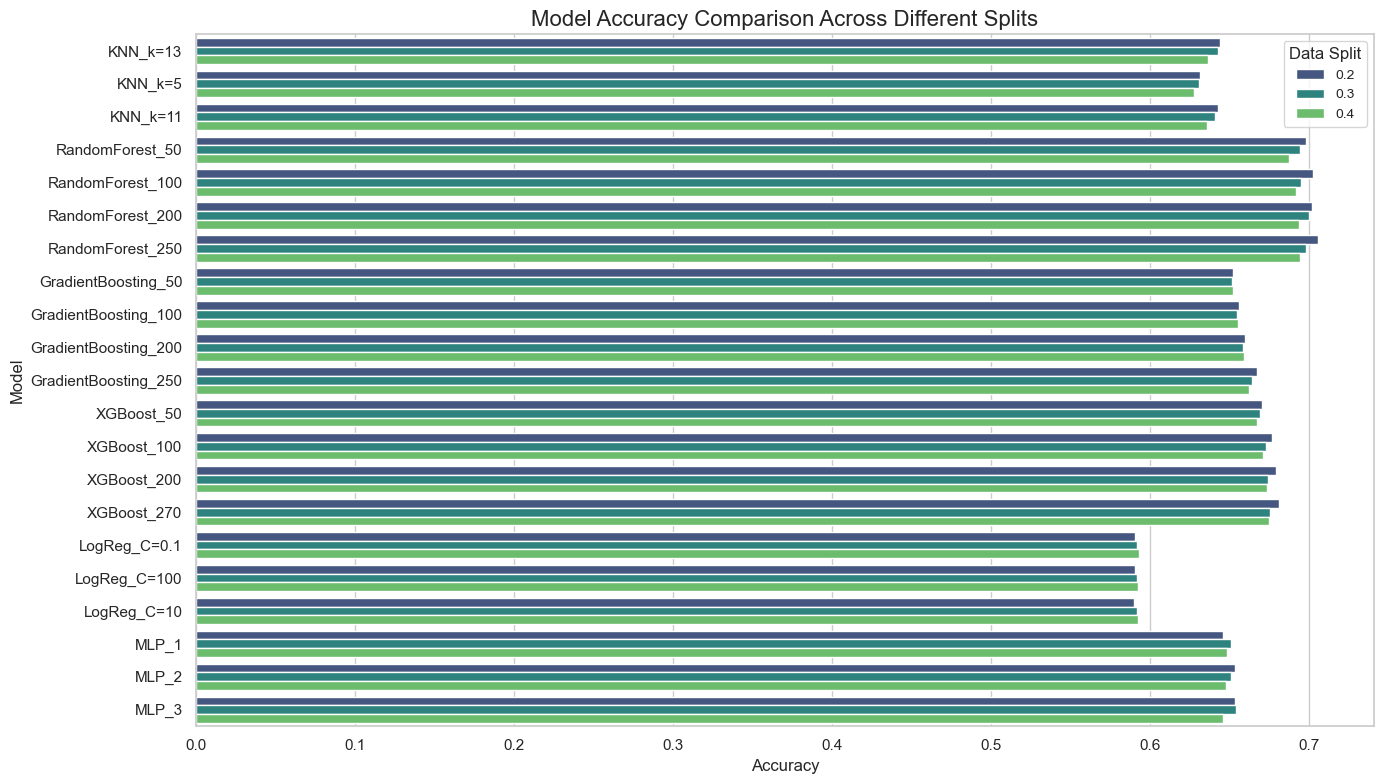

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and theme
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
df_results['Test Size'] = df_results['Test Size'].astype(str)

# Plot
sns.barplot(data=df_results, x='Test Accuracy', y='Model', hue='Test Size', palette='viridis')

# Customize
plt.title("Model Accuracy Comparison Across Different Splits", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.legend(title='Data Split', fontsize=10)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Model F1 Score Comparison Across Different Splits')

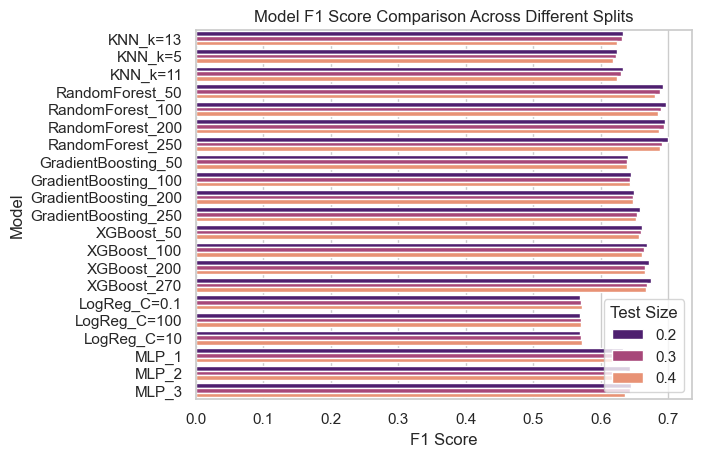

In [71]:
sns.barplot(data=df_results, x='F1 Score', y='Model', hue='Test Size', palette='magma')
plt.title("Model F1 Score Comparison Across Different Splits")

In [57]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import numpy as np

# Step 1: Define model options
model_options = {
    "XGBoost": XGBClassifier(n_estimators=270, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=250, random_state=42, criterion='entropy'),
    "Logistic Regression": LogisticRegression(C=10),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=500)
}

# Step 2: Identify feature types
categorical_features = ['Precip Type']  # Add any others as needed
numerical_features = [col for col in X.columns if col not in categorical_features]

# Step 3: Build input widgets
feature_widgets = {}

# Categorical feature widgets
for feature in categorical_features:
    unique_labels = df[feature].dropna().unique().tolist()
    feature_widgets[feature] = widgets.Dropdown(
        options=unique_labels,
        description=feature,
        layout=widgets.Layout(width='350px'),
        style={'description_width': '150px'} 
    )

# Numerical feature widgets
for feature in numerical_features:
    feature_widgets[feature] = widgets.FloatText(
        description=feature,
        layout=widgets.Layout(width='350px'),
        style={'description_width': '150px'} 
    )

# Step 4: Model selection and predict button
model_dropdown = widgets.Dropdown(
    options=list(model_options.keys()),
    description='Model:',
    layout=widgets.Layout(width='300px')
)

predict_button = widgets.Button(description="Train & Predict")
output = widgets.Output()

# Step 5: Callback function
def on_predict_click(b):
    with output:
        output.clear_output()
        try:
            user_inputs = []
            for feature in X.columns:
                widget = feature_widgets[feature]
                value = widget.value
                if feature in categorical_features:
                    value = le.transform([value])[0]  # Encode categorical
                user_inputs.append(value)

            input_array = np.array(user_inputs, dtype=float).reshape(1, -1)
            input_df = pd.DataFrame(input_array, columns=X.columns)
            input_scaled = scaler.transform(input_df)


            selected_model_name = model_dropdown.value
            model = model_options[selected_model_name]
            model.fit(X_scaled, y)

            prediction_encoded = model.predict(input_scaled)[0]
            prediction_label = le.inverse_transform([prediction_encoded])[0]
            print(f"Model Used: {selected_model_name}")
            print(f"Predicted Weather Summary: {prediction_label}")
        except Exception as e:
            print(f"Error: {str(e)}")

predict_button.on_click(on_predict_click)

# Step 6: Display the full interface
display(widgets.VBox([model_dropdown] + list(feature_widgets.values()) + [predict_button, output]))
